In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model

datasetPath = "dataset\\data_batch_"

In [5]:
def unpickle(path_batch):
    with open(path_batch, 'rb') as fo:
        batch = pickle.load(fo, encoding='latin1')
    features = batch['data'].reshape((len(batch['data']), 3, 32, 32)).transpose(0, 2, 3, 1)
    labels = batch['labels']
        
    return features, labels

In [6]:
def get_label_names():
    with open("dataset\\batches.meta", 'rb') as fo:
        data = pickle.load(fo, encoding='latin1')
    return (data['label_names'])

In [7]:
def display_batch_stat(batch_nb):
    features, labels = unpickle(datasetPath + str(batch_nb))
    print("Batch N° %s" % str(batch_nb), "\n")
    print("Number of Samples in batch %s" % str(len(features)), "\n")
    counts =  [[x, labels.count(x)] for x in set(labels)]
    for c in counts:
        print( "%s = %d <=> %.2f %s" % (label_names[c[0]], c[1], (100 * c[1]) / len(features), "%"))
    

In [8]:
label_names = get_label_names()
for i in range(1, 5):
    display_batch_stat(i)

Batch N° 1 

Number of Samples in batch 10000 

airplane = 1005 <=> 10.05 %
automobile = 974 <=> 9.74 %
bird = 1032 <=> 10.32 %
cat = 1016 <=> 10.16 %
deer = 999 <=> 9.99 %
dog = 937 <=> 9.37 %
frog = 1030 <=> 10.30 %
horse = 1001 <=> 10.01 %
ship = 1025 <=> 10.25 %
truck = 981 <=> 9.81 %
Batch N° 2 

Number of Samples in batch 10000 

airplane = 984 <=> 9.84 %
automobile = 1007 <=> 10.07 %
bird = 1010 <=> 10.10 %
cat = 995 <=> 9.95 %
deer = 1010 <=> 10.10 %
dog = 988 <=> 9.88 %
frog = 1008 <=> 10.08 %
horse = 1026 <=> 10.26 %
ship = 987 <=> 9.87 %
truck = 985 <=> 9.85 %
Batch N° 3 

Number of Samples in batch 10000 

airplane = 994 <=> 9.94 %
automobile = 1042 <=> 10.42 %
bird = 965 <=> 9.65 %
cat = 997 <=> 9.97 %
deer = 990 <=> 9.90 %
dog = 1029 <=> 10.29 %
frog = 978 <=> 9.78 %
horse = 1015 <=> 10.15 %
ship = 961 <=> 9.61 %
truck = 1029 <=> 10.29 %
Batch N° 4 

Number of Samples in batch 10000 

airplane = 1003 <=> 10.03 %
automobile = 963 <=> 9.63 %
bird = 1041 <=> 10.41 %
cat = 97

In [9]:
features, labels = unpickle("dataset\\data_batch_1")

In [10]:
X = features.flatten()

In [11]:
labels[1]

9

In [12]:
features[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

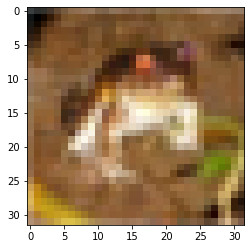

In [13]:
X = features.flatten().reshape(10000, 32*32*3)
plt.imshow(X[0].reshape(32, 32, 3))


In [14]:
X = features.flatten().reshape(10000, 32*32*3)
Y = np.asarray(labels)
Y_all = []
model_all = []

def linear_model(X_param, Y_param, activation_param, optimizer_param, loss_param, batch_size_param, epochs_param):
    model = tf.keras.Sequential()
    model.add(Dense(1, activation=activation_param, input_dim=32*32*3))
    model.compile(optimizer=optimizer_param, loss=loss_param, metrics=["accuracy"])

    model.fit(X_param, Y_param, batch_size=batch_size_param, verbose=1, epochs=epochs_param)
    return model


for i in range(10):
    Y_all.append(np.array([1 if y == i else 0 for y in Y]))
    model_all.append(linear_model(X, Y_all[i], "sigmoid", "adam", "binary_crossentropy", 10000, 200))


Train on 10000 samples
Epoch 1/200
10000/10000 [==============================] - 1s 83us/sample - loss: 28.0865 - accuracy: 0.5480
Epoch 2/200
10000/10000 [==============================] - 0s 4us/sample - loss: 49.7332 - accuracy: 0.8989
Epoch 3/200
10000/10000 [==============================] - 0s 4us/sample - loss: 61.2407 - accuracy: 0.8994
Epoch 4/200
10000/10000 [==============================] - 0s 4us/sample - loss: 57.9853 - accuracy: 0.8994
Epoch 5/200
10000/10000 [==============================] - 0s 4us/sample - loss: 46.0010 - accuracy: 0.8990
Epoch 6/200
10000/10000 [==============================] - 0s 4us/sample - loss: 28.4028 - accuracy: 0.8909
Epoch 7/200
10000/10000 [==============================] - 0s 4us/sample - loss: 16.5843 - accuracy: 0.6978
Epoch 8/200
10000/10000 [==============================] - 0s 4us/sample - loss: 55.2018 - accuracy: 0.2836
Epoch 9/200
10000/10000 [==============================] - 0s 4us/sample - loss: 14.3207 - accuracy: 0.7613
Epoc

Epoch 77/200
10000/10000 [==============================] - 0s 4us/sample - loss: 6.2099 - accuracy: 0.8485
Epoch 78/200
10000/10000 [==============================] - 0s 4us/sample - loss: 6.1009 - accuracy: 0.8403
Epoch 79/200
10000/10000 [==============================] - 0s 4us/sample - loss: 6.0869 - accuracy: 0.8239
Epoch 80/200
10000/10000 [==============================] - 0s 4us/sample - loss: 6.0156 - accuracy: 0.8276
Epoch 81/200
10000/10000 [==============================] - 0s 4us/sample - loss: 5.9609 - accuracy: 0.8418
Epoch 82/200
10000/10000 [==============================] - 0s 4us/sample - loss: 5.9333 - accuracy: 0.8450
Epoch 83/200
10000/10000 [==============================] - 0s 4us/sample - loss: 5.8498 - accuracy: 0.8359
Epoch 84/200
10000/10000 [==============================] - 0s 4us/sample - loss: 5.8376 - accuracy: 0.8250
Epoch 85/200
10000/10000 [==============================] - 0s 4us/sample - loss: 5.7616 - accuracy: 0.8323
Epoch 86/200
10000/10000 [==

Epoch 153/200
10000/10000 [==============================] - 0s 4us/sample - loss: 3.9496 - accuracy: 0.8363
Epoch 154/200
10000/10000 [==============================] - 0s 4us/sample - loss: 3.9337 - accuracy: 0.8376
Epoch 155/200
10000/10000 [==============================] - 0s 4us/sample - loss: 3.9179 - accuracy: 0.8374
Epoch 156/200
10000/10000 [==============================] - 0s 4us/sample - loss: 3.9023 - accuracy: 0.8374
Epoch 157/200
10000/10000 [==============================] - 0s 4us/sample - loss: 3.8869 - accuracy: 0.8381
Epoch 158/200
10000/10000 [==============================] - 0s 4us/sample - loss: 3.8716 - accuracy: 0.8377
Epoch 159/200
10000/10000 [==============================] - 0s 4us/sample - loss: 3.8564 - accuracy: 0.8372
Epoch 160/200
10000/10000 [==============================] - 0s 4us/sample - loss: 3.8414 - accuracy: 0.8380
Epoch 161/200
10000/10000 [==============================] - 0s 4us/sample - loss: 3.8266 - accuracy: 0.8372
Epoch 162/200
10000

10000/10000 [==============================] - 0s 4us/sample - loss: 7.4772 - accuracy: 0.8652
Epoch 29/200
10000/10000 [==============================] - 0s 4us/sample - loss: 7.8126 - accuracy: 0.7978
Epoch 30/200
10000/10000 [==============================] - 0s 4us/sample - loss: 8.2198 - accuracy: 0.7789
Epoch 31/200
10000/10000 [==============================] - 0s 4us/sample - loss: 7.0335 - accuracy: 0.8496
Epoch 32/200
10000/10000 [==============================] - 0s 4us/sample - loss: 7.5734 - accuracy: 0.8774
Epoch 33/200
10000/10000 [==============================] - 0s 4us/sample - loss: 7.7583 - accuracy: 0.8818
Epoch 34/200
10000/10000 [==============================] - 0s 4us/sample - loss: 7.0764 - accuracy: 0.8713
Epoch 35/200
10000/10000 [==============================] - 0s 4us/sample - loss: 6.8165 - accuracy: 0.8299
Epoch 36/200
10000/10000 [==============================] - 0s 4us/sample - loss: 7.3948 - accuracy: 0.7910
Epoch 37/200
10000/10000 [===============

Epoch 104/200
10000/10000 [==============================] - 0s 4us/sample - loss: 3.8325 - accuracy: 0.8631
Epoch 105/200
10000/10000 [==============================] - 0s 4us/sample - loss: 3.8110 - accuracy: 0.8661
Epoch 106/200
10000/10000 [==============================] - 0s 4us/sample - loss: 3.7871 - accuracy: 0.8640
Epoch 107/200
10000/10000 [==============================] - 0s 4us/sample - loss: 3.7654 - accuracy: 0.8640
Epoch 108/200
10000/10000 [==============================] - 0s 4us/sample - loss: 3.7432 - accuracy: 0.8660
Epoch 109/200
10000/10000 [==============================] - 0s 4us/sample - loss: 3.7208 - accuracy: 0.8653
Epoch 110/200
10000/10000 [==============================] - 0s 4us/sample - loss: 3.6999 - accuracy: 0.8645
Epoch 111/200
10000/10000 [==============================] - 0s 4us/sample - loss: 3.6777 - accuracy: 0.8660
Epoch 112/200
10000/10000 [==============================] - 0s 4us/sample - loss: 3.6569 - accuracy: 0.8668
Epoch 113/200
10000

Epoch 180/200
10000/10000 [==============================] - 0s 4us/sample - loss: 19.9905 - accuracy: 0.9026
Epoch 181/200
10000/10000 [==============================] - 0s 4us/sample - loss: 41.9270 - accuracy: 0.9026
Epoch 182/200
10000/10000 [==============================] - 0s 4us/sample - loss: 57.8894 - accuracy: 0.9026
Epoch 183/200
10000/10000 [==============================] - 0s 4us/sample - loss: 68.4801 - accuracy: 0.9026
Epoch 184/200
10000/10000 [==============================] - 0s 4us/sample - loss: 74.2410 - accuracy: 0.9026
Epoch 185/200
10000/10000 [==============================] - 0s 4us/sample - loss: 75.6593 - accuracy: 0.9026
Epoch 186/200
10000/10000 [==============================] - 0s 4us/sample - loss: 73.1733 - accuracy: 0.9026
Epoch 187/200
10000/10000 [==============================] - 0s 4us/sample - loss: 67.1772 - accuracy: 0.9026
Epoch 188/200
10000/10000 [==============================] - 0s 4us/sample - loss: 58.0255 - accuracy: 0.9026
Epoch 189/

Epoch 55/200
10000/10000 [==============================] - 0s 4us/sample - loss: 8.1456 - accuracy: 0.8139
Epoch 56/200
10000/10000 [==============================] - 0s 4us/sample - loss: 8.6967 - accuracy: 0.7585
Epoch 57/200
10000/10000 [==============================] - 0s 4us/sample - loss: 8.6458 - accuracy: 0.7583
Epoch 58/200
10000/10000 [==============================] - 0s 4us/sample - loss: 7.9524 - accuracy: 0.8092
Epoch 59/200
10000/10000 [==============================] - 0s 4us/sample - loss: 8.1549 - accuracy: 0.8424
Epoch 60/200
10000/10000 [==============================] - 0s 4us/sample - loss: 8.3785 - accuracy: 0.8528
Epoch 61/200
10000/10000 [==============================] - 0s 4us/sample - loss: 8.1007 - accuracy: 0.8455
Epoch 62/200
10000/10000 [==============================] - 0s 4us/sample - loss: 7.7008 - accuracy: 0.8228
Epoch 63/200
10000/10000 [==============================] - 0s 4us/sample - loss: 7.8548 - accuracy: 0.7844
Epoch 64/200
10000/10000 [==

Epoch 131/200
10000/10000 [==============================] - 0s 4us/sample - loss: 5.0619 - accuracy: 0.8228
Epoch 132/200
10000/10000 [==============================] - 0s 4us/sample - loss: 5.0424 - accuracy: 0.8204
Epoch 133/200
10000/10000 [==============================] - 0s 4us/sample - loss: 5.0233 - accuracy: 0.8201
Epoch 134/200
10000/10000 [==============================] - 0s 4us/sample - loss: 5.0040 - accuracy: 0.8223
Epoch 135/200
10000/10000 [==============================] - 0s 4us/sample - loss: 4.9854 - accuracy: 0.8231
Epoch 136/200
10000/10000 [==============================] - 0s 4us/sample - loss: 4.9664 - accuracy: 0.8217
Epoch 137/200
10000/10000 [==============================] - 0s 4us/sample - loss: 4.9482 - accuracy: 0.8206
Epoch 138/200
10000/10000 [==============================] - 0s 4us/sample - loss: 4.9295 - accuracy: 0.8223
Epoch 139/200
10000/10000 [==============================] - 0s 4us/sample - loss: 4.9117 - accuracy: 0.8235
Epoch 140/200
10000

Epoch 6/200
10000/10000 [==============================] - 0s 4us/sample - loss: 73.0548 - accuracy: 0.8984
Epoch 7/200
10000/10000 [==============================] - 0s 4us/sample - loss: 74.9572 - accuracy: 0.8984
Epoch 8/200
10000/10000 [==============================] - 0s 4us/sample - loss: 74.5037 - accuracy: 0.8984
Epoch 9/200
10000/10000 [==============================] - 0s 4us/sample - loss: 72.0595 - accuracy: 0.8984
Epoch 10/200
10000/10000 [==============================] - 0s 4us/sample - loss: 67.8982 - accuracy: 0.8984
Epoch 11/200
10000/10000 [==============================] - 0s 4us/sample - loss: 62.2320 - accuracy: 0.8984
Epoch 12/200
10000/10000 [==============================] - 0s 4us/sample - loss: 55.2312 - accuracy: 0.8984
Epoch 13/200
10000/10000 [==============================] - 0s 4us/sample - loss: 47.0351 - accuracy: 0.8984
Epoch 14/200
10000/10000 [==============================] - 0s 4us/sample - loss: 37.7622 - accuracy: 0.8983
Epoch 15/200
10000/1000

Epoch 82/200
10000/10000 [==============================] - 0s 4us/sample - loss: 6.2986 - accuracy: 0.8470
Epoch 83/200
10000/10000 [==============================] - 0s 4us/sample - loss: 6.1961 - accuracy: 0.8390
Epoch 84/200
10000/10000 [==============================] - 0s 4us/sample - loss: 6.1589 - accuracy: 0.8228
Epoch 85/200
10000/10000 [==============================] - 0s 4us/sample - loss: 6.1678 - accuracy: 0.8142
Epoch 86/200
10000/10000 [==============================] - 0s 4us/sample - loss: 6.0713 - accuracy: 0.8277
Epoch 87/200
10000/10000 [==============================] - 0s 4us/sample - loss: 6.0496 - accuracy: 0.8406
Epoch 88/200
10000/10000 [==============================] - 0s 4us/sample - loss: 6.0364 - accuracy: 0.8434
Epoch 89/200
10000/10000 [==============================] - 0s 4us/sample - loss: 5.9610 - accuracy: 0.8352
Epoch 90/200
10000/10000 [==============================] - 0s 4us/sample - loss: 5.9364 - accuracy: 0.8236
Epoch 91/200
10000/10000 [==

Epoch 158/200
10000/10000 [==============================] - 0s 4us/sample - loss: 4.3557 - accuracy: 0.8304
Epoch 159/200
10000/10000 [==============================] - 0s 4us/sample - loss: 4.3413 - accuracy: 0.8301
Epoch 160/200
10000/10000 [==============================] - 0s 4us/sample - loss: 4.3270 - accuracy: 0.8304
Epoch 161/200
10000/10000 [==============================] - 0s 4us/sample - loss: 4.3128 - accuracy: 0.8306
Epoch 162/200
10000/10000 [==============================] - 0s 4us/sample - loss: 4.2988 - accuracy: 0.8301
Epoch 163/200
10000/10000 [==============================] - 0s 4us/sample - loss: 4.2848 - accuracy: 0.8304
Epoch 164/200
10000/10000 [==============================] - 0s 4us/sample - loss: 4.2710 - accuracy: 0.8312
Epoch 165/200
10000/10000 [==============================] - 0s 4us/sample - loss: 4.2572 - accuracy: 0.8306
Epoch 166/200
10000/10000 [==============================] - 0s 4us/sample - loss: 4.2436 - accuracy: 0.8300
Epoch 167/200
10000

10000/10000 [==============================] - 0s 4us/sample - loss: 15.8163 - accuracy: 0.6265
Epoch 34/200
10000/10000 [==============================] - 0s 4us/sample - loss: 8.9036 - accuracy: 0.7805
Epoch 35/200
10000/10000 [==============================] - 0s 4us/sample - loss: 8.8987 - accuracy: 0.8663
Epoch 36/200
10000/10000 [==============================] - 0s 4us/sample - loss: 11.2667 - accuracy: 0.8876
Epoch 37/200
10000/10000 [==============================] - 0s 4us/sample - loss: 12.7667 - accuracy: 0.8924
Epoch 38/200
10000/10000 [==============================] - 0s 4us/sample - loss: 12.8801 - accuracy: 0.8924
Epoch 39/200
10000/10000 [==============================] - 0s 4us/sample - loss: 11.6777 - accuracy: 0.8907
Epoch 40/200
10000/10000 [==============================] - 0s 4us/sample - loss: 9.4968 - accuracy: 0.8808
Epoch 41/200
10000/10000 [==============================] - 0s 4us/sample - loss: 7.6427 - accuracy: 0.8412
Epoch 42/200
10000/10000 [==========

Epoch 109/200
10000/10000 [==============================] - 0s 4us/sample - loss: 5.3904 - accuracy: 0.8334
Epoch 110/200
10000/10000 [==============================] - 0s 4us/sample - loss: 5.3731 - accuracy: 0.8352
Epoch 111/200
10000/10000 [==============================] - 0s 4us/sample - loss: 5.3486 - accuracy: 0.8322
Epoch 112/200
10000/10000 [==============================] - 0s 4us/sample - loss: 5.3317 - accuracy: 0.8256
Epoch 113/200
10000/10000 [==============================] - 0s 4us/sample - loss: 5.3107 - accuracy: 0.8267
Epoch 114/200
10000/10000 [==============================] - 0s 4us/sample - loss: 5.2896 - accuracy: 0.8327
Epoch 115/200
10000/10000 [==============================] - 0s 4us/sample - loss: 5.2724 - accuracy: 0.8344
Epoch 116/200
10000/10000 [==============================] - 0s 4us/sample - loss: 5.2503 - accuracy: 0.8321
Epoch 117/200
10000/10000 [==============================] - 0s 4us/sample - loss: 5.2322 - accuracy: 0.8277
Epoch 118/200
10000

Epoch 185/200
10000/10000 [==============================] - 0s 4us/sample - loss: 4.1610 - accuracy: 0.8316
Epoch 186/200
10000/10000 [==============================] - 0s 4us/sample - loss: 4.1480 - accuracy: 0.8317
Epoch 187/200
10000/10000 [==============================] - 0s 4us/sample - loss: 4.1352 - accuracy: 0.8316
Epoch 188/200
10000/10000 [==============================] - 0s 4us/sample - loss: 4.1223 - accuracy: 0.8320
Epoch 189/200
10000/10000 [==============================] - 0s 4us/sample - loss: 4.1096 - accuracy: 0.8318
Epoch 190/200
10000/10000 [==============================] - 0s 4us/sample - loss: 4.0969 - accuracy: 0.8314
Epoch 191/200
10000/10000 [==============================] - 0s 4us/sample - loss: 4.0843 - accuracy: 0.8313
Epoch 192/200
10000/10000 [==============================] - 0s 4us/sample - loss: 4.0717 - accuracy: 0.8317
Epoch 193/200
10000/10000 [==============================] - 0s 4us/sample - loss: 4.0592 - accuracy: 0.8318
Epoch 194/200
10000

Epoch 61/200
10000/10000 [==============================] - 0s 4us/sample - loss: 6.6279 - accuracy: 0.8271
Epoch 62/200
10000/10000 [==============================] - 0s 4us/sample - loss: 6.7495 - accuracy: 0.8083
Epoch 63/200
10000/10000 [==============================] - 0s 4us/sample - loss: 6.5093 - accuracy: 0.8306
Epoch 64/200
10000/10000 [==============================] - 0s 4us/sample - loss: 6.5417 - accuracy: 0.8532
Epoch 65/200
10000/10000 [==============================] - 0s 4us/sample - loss: 6.5322 - accuracy: 0.8555
Epoch 66/200
10000/10000 [==============================] - 0s 4us/sample - loss: 6.3595 - accuracy: 0.8426
Epoch 67/200
10000/10000 [==============================] - 0s 4us/sample - loss: 6.3954 - accuracy: 0.8172
Epoch 68/200
10000/10000 [==============================] - 0s 4us/sample - loss: 6.3150 - accuracy: 0.8205
Epoch 69/200
10000/10000 [==============================] - 0s 4us/sample - loss: 6.2282 - accuracy: 0.8460
Epoch 70/200
10000/10000 [==

Epoch 137/200
10000/10000 [==============================] - 0s 4us/sample - loss: 4.1079 - accuracy: 0.8380
Epoch 138/200
10000/10000 [==============================] - 0s 4us/sample - loss: 4.0875 - accuracy: 0.8367
Epoch 139/200
10000/10000 [==============================] - 0s 4us/sample - loss: 4.0676 - accuracy: 0.8362
Epoch 140/200
10000/10000 [==============================] - 0s 4us/sample - loss: 4.0476 - accuracy: 0.8378
Epoch 141/200
10000/10000 [==============================] - 0s 4us/sample - loss: 4.0279 - accuracy: 0.8375
Epoch 142/200
10000/10000 [==============================] - 0s 4us/sample - loss: 4.0084 - accuracy: 0.8364
Epoch 143/200
10000/10000 [==============================] - 0s 4us/sample - loss: 3.9890 - accuracy: 0.8373
Epoch 144/200
10000/10000 [==============================] - 0s 4us/sample - loss: 3.9699 - accuracy: 0.8374
Epoch 145/200
10000/10000 [==============================] - 0s 4us/sample - loss: 3.9509 - accuracy: 0.8368
Epoch 146/200
10000

10000/10000 [==============================] - 0s 4us/sample - loss: 60.6249 - accuracy: 0.8970
Epoch 13/200
10000/10000 [==============================] - 0s 4us/sample - loss: 54.5123 - accuracy: 0.8970
Epoch 14/200
10000/10000 [==============================] - 0s 4us/sample - loss: 47.4213 - accuracy: 0.8970
Epoch 15/200
10000/10000 [==============================] - 0s 4us/sample - loss: 39.4534 - accuracy: 0.8965
Epoch 16/200
10000/10000 [==============================] - 0s 4us/sample - loss: 30.7660 - accuracy: 0.8945
Epoch 17/200
10000/10000 [==============================] - 0s 4us/sample - loss: 21.9086 - accuracy: 0.8847
Epoch 18/200
10000/10000 [==============================] - 0s 4us/sample - loss: 16.3493 - accuracy: 0.8106
Epoch 19/200
10000/10000 [==============================] - 0s 4us/sample - loss: 28.5608 - accuracy: 0.5846
Epoch 20/200
10000/10000 [==============================] - 0s 4us/sample - loss: 38.1938 - accuracy: 0.4881
Epoch 21/200
10000/10000 [======

Epoch 88/200
10000/10000 [==============================] - 0s 4us/sample - loss: 5.6000 - accuracy: 0.8426
Epoch 89/200
10000/10000 [==============================] - 0s 4us/sample - loss: 5.5929 - accuracy: 0.8327
Epoch 90/200
10000/10000 [==============================] - 0s 4us/sample - loss: 5.5468 - accuracy: 0.8336
Epoch 91/200
10000/10000 [==============================] - 0s 4us/sample - loss: 5.4871 - accuracy: 0.8448
Epoch 92/200
10000/10000 [==============================] - 0s 4us/sample - loss: 5.4729 - accuracy: 0.8513
Epoch 93/200
10000/10000 [==============================] - 0s 4us/sample - loss: 5.4360 - accuracy: 0.8512
Epoch 94/200
10000/10000 [==============================] - 0s 4us/sample - loss: 5.3824 - accuracy: 0.8441
Epoch 95/200
10000/10000 [==============================] - 0s 4us/sample - loss: 5.3630 - accuracy: 0.8385
Epoch 96/200
10000/10000 [==============================] - 0s 4us/sample - loss: 5.3328 - accuracy: 0.8386
Epoch 97/200
10000/10000 [==

Epoch 164/200
10000/10000 [==============================] - 0s 4us/sample - loss: 3.9317 - accuracy: 0.8494
Epoch 165/200
10000/10000 [==============================] - 0s 4us/sample - loss: 3.9176 - accuracy: 0.8496
Epoch 166/200
10000/10000 [==============================] - 0s 4us/sample - loss: 3.9036 - accuracy: 0.8494
Epoch 167/200
10000/10000 [==============================] - 0s 4us/sample - loss: 3.8897 - accuracy: 0.8494
Epoch 168/200
10000/10000 [==============================] - 0s 4us/sample - loss: 3.8759 - accuracy: 0.8498
Epoch 169/200
10000/10000 [==============================] - 0s 4us/sample - loss: 3.8622 - accuracy: 0.8502
Epoch 170/200
10000/10000 [==============================] - 0s 4us/sample - loss: 3.8487 - accuracy: 0.8503
Epoch 171/200
10000/10000 [==============================] - 0s 4us/sample - loss: 3.8352 - accuracy: 0.8500
Epoch 172/200
10000/10000 [==============================] - 0s 4us/sample - loss: 3.8218 - accuracy: 0.8502
Epoch 173/200
10000

10000/10000 [==============================] - 0s 4us/sample - loss: 13.4752 - accuracy: 0.8826
Epoch 40/200
10000/10000 [==============================] - 0s 4us/sample - loss: 15.4425 - accuracy: 0.8905
Epoch 41/200
10000/10000 [==============================] - 0s 4us/sample - loss: 15.9456 - accuracy: 0.8921
Epoch 42/200
10000/10000 [==============================] - 0s 4us/sample - loss: 14.9609 - accuracy: 0.8903
Epoch 43/200
10000/10000 [==============================] - 0s 4us/sample - loss: 12.7820 - accuracy: 0.8827
Epoch 44/200
10000/10000 [==============================] - 0s 4us/sample - loss: 10.3263 - accuracy: 0.8567
Epoch 45/200
10000/10000 [==============================] - 0s 4us/sample - loss: 10.4716 - accuracy: 0.7784
Epoch 46/200
10000/10000 [==============================] - 0s 4us/sample - loss: 13.5016 - accuracy: 0.6865
Epoch 47/200
10000/10000 [==============================] - 0s 4us/sample - loss: 11.2547 - accuracy: 0.7431
Epoch 48/200
10000/10000 [======

Epoch 115/200
10000/10000 [==============================] - 0s 4us/sample - loss: 5.5800 - accuracy: 0.8344
Epoch 116/200
10000/10000 [==============================] - 0s 4us/sample - loss: 5.5480 - accuracy: 0.8382
Epoch 117/200
10000/10000 [==============================] - 0s 4us/sample - loss: 5.5226 - accuracy: 0.8412
Epoch 118/200
10000/10000 [==============================] - 0s 4us/sample - loss: 5.4919 - accuracy: 0.8401
Epoch 119/200
10000/10000 [==============================] - 0s 4us/sample - loss: 5.4635 - accuracy: 0.8362
Epoch 120/200
10000/10000 [==============================] - 0s 4us/sample - loss: 5.4381 - accuracy: 0.8344
Epoch 121/200
10000/10000 [==============================] - 0s 4us/sample - loss: 5.4086 - accuracy: 0.8370
Epoch 122/200
10000/10000 [==============================] - 0s 4us/sample - loss: 5.3827 - accuracy: 0.8396
Epoch 123/200
10000/10000 [==============================] - 0s 4us/sample - loss: 5.3571 - accuracy: 0.8403
Epoch 124/200
10000

Epoch 191/200
10000/10000 [==============================] - 0s 4us/sample - loss: 4.1570 - accuracy: 0.8448
Epoch 192/200
10000/10000 [==============================] - 0s 4us/sample - loss: 4.1444 - accuracy: 0.8450
Epoch 193/200
10000/10000 [==============================] - 0s 4us/sample - loss: 4.1319 - accuracy: 0.8457
Epoch 194/200
10000/10000 [==============================] - 0s 4us/sample - loss: 4.1195 - accuracy: 0.8456
Epoch 195/200
10000/10000 [==============================] - 0s 4us/sample - loss: 4.1072 - accuracy: 0.8458
Epoch 196/200
10000/10000 [==============================] - 0s 4us/sample - loss: 4.0950 - accuracy: 0.8461
Epoch 197/200
10000/10000 [==============================] - 0s 4us/sample - loss: 4.0829 - accuracy: 0.8464
Epoch 198/200
10000/10000 [==============================] - 0s 4us/sample - loss: 4.0708 - accuracy: 0.8463
Epoch 199/200
10000/10000 [==============================] - 0s 4us/sample - loss: 4.0588 - accuracy: 0.8461
Epoch 200/200
10000

Epoch 67/200
10000/10000 [==============================] - 0s 4us/sample - loss: 6.3384 - accuracy: 0.8172
Epoch 68/200
10000/10000 [==============================] - 0s 4us/sample - loss: 6.2030 - accuracy: 0.8368
Epoch 69/200
10000/10000 [==============================] - 0s 4us/sample - loss: 6.2797 - accuracy: 0.8481
Epoch 70/200
10000/10000 [==============================] - 0s 4us/sample - loss: 6.1802 - accuracy: 0.8445
Epoch 71/200
10000/10000 [==============================] - 0s 4us/sample - loss: 6.0695 - accuracy: 0.8274
Epoch 72/200
10000/10000 [==============================] - 0s 4us/sample - loss: 6.1303 - accuracy: 0.8155
Epoch 73/200
10000/10000 [==============================] - 0s 4us/sample - loss: 6.0129 - accuracy: 0.8215
Epoch 74/200
10000/10000 [==============================] - 0s 4us/sample - loss: 5.9640 - accuracy: 0.8377
Epoch 75/200
10000/10000 [==============================] - 0s 4us/sample - loss: 5.9873 - accuracy: 0.8440
Epoch 76/200
10000/10000 [==

Epoch 143/200
10000/10000 [==============================] - 0s 4us/sample - loss: 4.3100 - accuracy: 0.8349
Epoch 144/200
10000/10000 [==============================] - 0s 4us/sample - loss: 4.2932 - accuracy: 0.8349
Epoch 145/200
10000/10000 [==============================] - 0s 4us/sample - loss: 4.2766 - accuracy: 0.8364
Epoch 146/200
10000/10000 [==============================] - 0s 4us/sample - loss: 4.2600 - accuracy: 0.8355
Epoch 147/200
10000/10000 [==============================] - 0s 4us/sample - loss: 4.2437 - accuracy: 0.8352
Epoch 148/200
10000/10000 [==============================] - 0s 4us/sample - loss: 4.2274 - accuracy: 0.8359
Epoch 149/200
10000/10000 [==============================] - 0s 4us/sample - loss: 4.2112 - accuracy: 0.8359
Epoch 150/200
10000/10000 [==============================] - 0s 4us/sample - loss: 4.1951 - accuracy: 0.8359
Epoch 151/200
10000/10000 [==============================] - 0s 4us/sample - loss: 4.1791 - accuracy: 0.8362
Epoch 152/200
10000

10000/10000 [==============================] - 0s 4us/sample - loss: 40.1776 - accuracy: 0.5068
Epoch 19/200
10000/10000 [==============================] - 0s 4us/sample - loss: 25.9769 - accuracy: 0.6319
Epoch 20/200
10000/10000 [==============================] - 0s 4us/sample - loss: 13.2686 - accuracy: 0.8130
Epoch 21/200
10000/10000 [==============================] - 0s 4us/sample - loss: 15.5561 - accuracy: 0.8839
Epoch 22/200
10000/10000 [==============================] - 0s 4us/sample - loss: 20.7001 - accuracy: 0.8965
Epoch 23/200
10000/10000 [==============================] - 0s 4us/sample - loss: 24.2650 - accuracy: 0.8995
Epoch 24/200
10000/10000 [==============================] - 0s 4us/sample - loss: 25.7978 - accuracy: 0.9002
Epoch 25/200
10000/10000 [==============================] - 0s 4us/sample - loss: 25.3829 - accuracy: 0.9003
Epoch 26/200
10000/10000 [==============================] - 0s 4us/sample - loss: 23.1929 - accuracy: 0.8995
Epoch 27/200
10000/10000 [======

Epoch 94/200
10000/10000 [==============================] - 0s 4us/sample - loss: 6.0436 - accuracy: 0.8526
Epoch 95/200
10000/10000 [==============================] - 0s 4us/sample - loss: 6.0044 - accuracy: 0.8521
Epoch 96/200
10000/10000 [==============================] - 0s 4us/sample - loss: 5.9532 - accuracy: 0.8575
Epoch 97/200
10000/10000 [==============================] - 0s 4us/sample - loss: 5.9209 - accuracy: 0.8621
Epoch 98/200
10000/10000 [==============================] - 0s 4us/sample - loss: 5.8853 - accuracy: 0.8621
Epoch 99/200
10000/10000 [==============================] - 0s 4us/sample - loss: 5.8384 - accuracy: 0.8594
Epoch 100/200
10000/10000 [==============================] - 0s 4us/sample - loss: 5.8040 - accuracy: 0.8542
Epoch 101/200
10000/10000 [==============================] - 0s 4us/sample - loss: 5.7707 - accuracy: 0.8530
Epoch 102/200
10000/10000 [==============================] - 0s 4us/sample - loss: 5.7265 - accuracy: 0.8572
Epoch 103/200
10000/10000

Epoch 170/200
10000/10000 [==============================] - 0s 4us/sample - loss: 3.9709 - accuracy: 0.8613
Epoch 171/200
10000/10000 [==============================] - 0s 4us/sample - loss: 3.9532 - accuracy: 0.8612
Epoch 172/200
10000/10000 [==============================] - 0s 4us/sample - loss: 3.9356 - accuracy: 0.8614
Epoch 173/200
10000/10000 [==============================] - 0s 4us/sample - loss: 3.9181 - accuracy: 0.8614
Epoch 174/200
10000/10000 [==============================] - 0s 4us/sample - loss: 3.9008 - accuracy: 0.8613
Epoch 175/200
10000/10000 [==============================] - 0s 4us/sample - loss: 3.8836 - accuracy: 0.8615
Epoch 176/200
10000/10000 [==============================] - 0s 4us/sample - loss: 3.8666 - accuracy: 0.8617
Epoch 177/200
10000/10000 [==============================] - 0s 4us/sample - loss: 3.8497 - accuracy: 0.8614
Epoch 178/200
10000/10000 [==============================] - 0s 4us/sample - loss: 3.8330 - accuracy: 0.8613
Epoch 179/200
10000

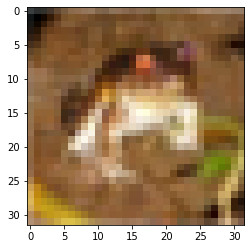

In [15]:
plt.imshow(X[0].reshape(32, 32, 3))

In [16]:
np.shape(X[0].reshape(3072))
print(X[0])

[ 59  62  63 ... 123  92  72]


In [20]:
def predict_liear(model_all, X):
    res = []
    for model in model_all:
        img = X.reshape(1, 3072)
        res.append(model.predict(img)[0][0])
    print(res)
    return res.index(max(res))
    

img_index = 31
res = predict_liear(model_all, X[img_index])

print("Image predicted is a: " + label_names[res])
print("Image is supposed to be a: " + label_names[Y[img_index]])


[0.0, 0.0, 0.0, 0.00011112009, 0.0, 0.0, 0.0, 0.0, 0.9963899, 0.9987295]
Image predicted is a: truck
Image is supposed to be a: truck


In [45]:
label_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']